In [1]:
import pandas as pd
from pyopenms import MzMLFile, MSExperiment, OnDiscMSExperiment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_df_with_original_id_mapped(df, exp, mapping_df):
    df = df.copy()
    ms2_spectra = np.array([spectrum for spectrum in exp.getSpectra() if spectrum.getMSLevel() == 2])
    ms2_spectra_in_df = ms2_spectra[df["MS2.Scan"].to_numpy()]
    df.insert(len(df.columns), "remapped_ids", [s.getNativeID() for s in ms2_spectra_in_df])
    df.insert(len(df.columns), "original_ids", [mapping_df.loc[remapped_id]["original_id"] for remapped_id in df["remapped_ids"]])
    return df

In [3]:
exp_all = MSExperiment()
MzMLFile().load("../../data/230928_JL_Immonium_ions_Modified_DIA_lower_energy.mzML", exp_all)

In [4]:
exp_subset = MSExperiment()
MzMLFile().load("../../data/workflow_test_tolerance_snr3_10ppm/lower_energy_windows_Y(UniMod:21).mzML", exp_subset)

In [5]:
mapping_df_all = pd.read_csv("../../data/230928_JL_Immonium_ions_Modified_DIA_id_mapping.csv", index_col="renamed_id")
mapping_df_subset = pd.read_csv("../../data/workflow_test_tolerance_snr3_10ppm/spectrum_id_mapping_Y(UniMod:21).csv", index_col="renamed_id")

In [7]:
df_phospho_all = get_df_with_original_id_mapped(pd.read_csv("../../data/diann_results/dia_nn_results_filtered/report_filtered_phospho_all_spectra.tsv", delimiter="\t"), exp_all, mapping_df_all)

df_phospho_subset = get_df_with_original_id_mapped(pd.read_csv("../../data/diann_results/dia_nn_results_filtered/report_filtered_phospho.tsv", delimiter="\t"), exp_subset, mapping_df_subset)

In [32]:
df_phospho_all["Protein.Ids"].unique()

array(['P27694;X00001', 'O14976;O14976-2;X00005',
       'Q9NPA8;Q9NPA8-2;X00001', 'P07954;P07954-2', 'X00001',
       'P37837;P37837-2;X00001', 'P29474;P29474-2;P29474-3;X00005',
       'P18206;P18206-2',
       'P06733;P09104;P13929;P09104-2;P13929-2;P13929-3;X00005', 'Q09666',
       'Q9NUV9', 'P53041;X00005', 'X00005', 'Q9H0A0;Q9H0A0-2;X00001',
       'Q13813;Q13813-2;Q13813-3;X00001', 'Q13237;Q13237-2',
       'P09104;P09104-2', 'P02647', 'Q13813;Q13813-2;Q13813-3',
       'Q99614;X00005', 'P18206;P18206-2;X00001',
       'Q13428;Q13428-5;Q13428-2;Q13428-3;Q13428-4;Q13428-6;Q13428-7;Q13428-8;X00001',
       'P27816;P27816-2;P27816-6;X00001', 'P20700;X00005',
       'P25440;P25440-2;P25440-3;P25440-4;X00001',
       'Q16630;Q16630-2;Q16630-3', 'P30049;X00001',
       'Q13428;Q13428-5;Q13428-2;Q13428-3;Q13428-4;Q13428-6;Q13428-7;Q13428-8',
       'P27824;P27824-2;X00005', 'Q9Y2W2;X00005', 'P49005;X00001',
       'P12111;P12111-2', 'Q8WW12;Q8WW12-2;X00001',
       'Q86V48;Q86V48-2;Q8

In [44]:
df_phospho_all[df_phospho_all["Protein.Q.Value"] <= 0.01]["Protein.Ids"].str.contains("X0000").sum()

924

In [43]:
len(df_phospho_all[df_phospho_all["Protein.Q.Value"] <= 0.01])

1109

In [47]:
df_phospho_all["Protein.Ids"].str.contains("X0000").sum()

1178

In [8]:
df_phospho_subset["original_ids"]

0       controllerType=0 controllerNumber=1 scan=67454
1       controllerType=0 controllerNumber=1 scan=58487
2       controllerType=0 controllerNumber=1 scan=54983
3       controllerType=0 controllerNumber=1 scan=85723
4       controllerType=0 controllerNumber=1 scan=37681
                             ...                      
3107    controllerType=0 controllerNumber=1 scan=35050
3108    controllerType=0 controllerNumber=1 scan=30808
3109    controllerType=0 controllerNumber=1 scan=34322
3110    controllerType=0 controllerNumber=1 scan=34314
3111    controllerType=0 controllerNumber=1 scan=86013
Name: original_ids, Length: 3112, dtype: object

In [9]:
len(df_phospho_all["Precursor.Id"].unique())

1368

In [11]:
len(df_phospho_subset["MS2.Scan"])

3112

In [12]:
df_phospho_all["Modified.Sequence"].str.contains("UniMod:21").sum()

373

In [53]:
df_phospho_all[df_phospho_all["Modified.Sequence"].str.contains("UniMod:21")]["Protein.Ids"].str.contains("X00002").sum()

3

In [31]:
df_phospho_subset[df_phospho_subset["Q.Value"] < 0.45]["Modified.Sequence"].str.contains("UniMod:21").sum()

487

In [14]:
subset_matching_windows = df_phospho_subset.merge(df_phospho_all, on="original_ids", suffixes=("_subset", "_all"))
subset_matching_windows_precursors = subset_matching_windows[subset_matching_windows["Precursor.Id_subset"] == subset_matching_windows["Precursor.Id_all"]]

In [15]:
subset_matching_windows_precursors["Modified.Sequence_subset"].str.contains("UniMod:21").sum()

151

In [69]:
# subset_matching_windows = df_phospho_subset[np.logical_and(df_phospho_subset["original_ids"].isin(df_phospho_all["original_ids"]), df_phospho_subset["Precursor.Id"].isin(df_phospho_all["Precursor.Id"]))]
# subset_matching_windows_precursors = subset_matching_windows[subset_matching_windows["Precursor.Id"].isin(df_phospho_all["Precursor.Id"])]

In [16]:
len(subset_matching_windows_precursors), subset_matching_windows_precursors["Q.Value_subset"].max()

(548, 0.490314)

<BarContainer object of 548 artists>

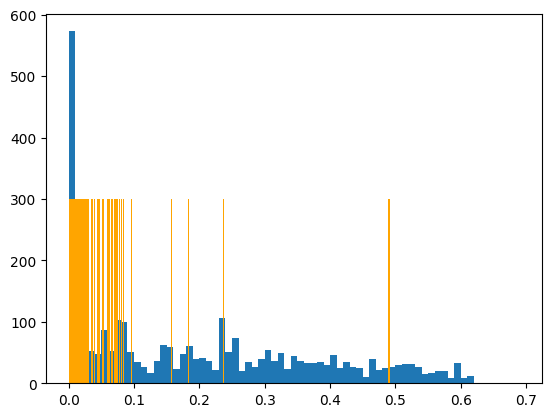

In [29]:
plt.hist(df_phospho_subset["Q.Value"], bins=np.arange(0, 0.7, 0.01))
plt.bar(subset_matching_windows_precursors["Q.Value_subset"], np.repeat(300, len(subset_matching_windows_precursors)), width=0.002, color="orange")

<BarContainer object of 584 artists>

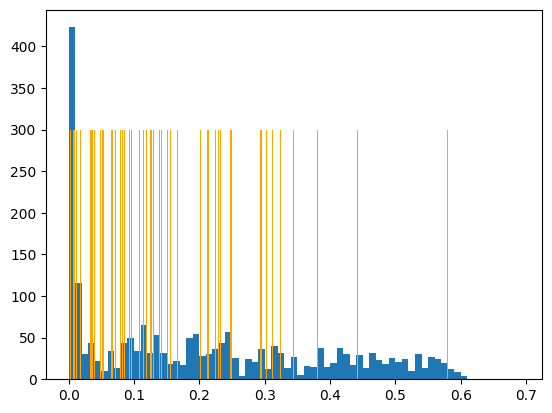

In [68]:
# subset_likely_true_precursors = df_phospho_subset[df_phospho_subset["Precursor.Id"].isin(df_phospho_all["Precursor.Id"])]
# plt.hist(df_phospho_subset["Q.Value"], bins=np.arange(0, 0.7, 0.01))
# plt.bar(subset_likely_true_precursors["Q.Value"], np.repeat(300, len(subset_likely_true_precursors)), width=0.001, color="orange")